In [1]:
!pip install selenium
!pip install BeautifulSoup
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

  Using cached https://files.pythonhosted.org/packages/40/f2/6c9f2f3e696ee6a1fb0e4d7850617e224ed2b0b1e872110abffeca2a09d4/BeautifulSoup-3.2.2.tar.gz
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: use options instead of chrome_options
  del sys.path[0]


In [2]:
!pip install beautifulsoup4

In [3]:
## short, news data

def get_html_loadmore(url,num_pages):
  import requests
  from bs4 import BeautifulSoup
  import pandas as pd
  from selenium import webdriver
  import time
  from selenium.webdriver.support.ui import WebDriverWait
  from selenium.webdriver.common.by import By
  from selenium.webdriver.support import expected_conditions as EC
  from selenium import webdriver
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

  url = url
  wd.get(url)
  html = wd.page_source.encode('utf-8')
  page_num = 0
  while (wd.find_elements_by_id('load-more-btn') and page_num<num_pages):
    wd.find_element_by_id('load-more-btn').click()
    time.sleep(2)
    page_num+=1
  html = wd.page_source.encode('utf-8')
  return html
  



In [4]:
from bs4 import BeautifulSoup
short_text=[]
news=[]
html =get_html_loadmore("https://inshorts.com/en/read",40)
soup = BeautifulSoup(html, "lxml")
short_text_soup=soup.find_all('div', class_=["news-card-title news-right-box"])
news_soup=soup.find_all('div', class_=["news-card-content news-right-box"])

for i in short_text_soup:
  short_text.append(i.find('span',attrs={'itemprop':"headline"}).string)

for j in news_soup:
  news.append(j.find('div',attrs={'itemprop':"articleBody"}).string)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


In [5]:
import pandas as pd
short_text_df=(pd.DataFrame(short_text)).to_csv("short_text.csv")
news_text_df=(pd.DataFrame(news)).to_csv("news.csv")

In [6]:
## social media tweet data
import tweepy
consumer_key = "v6DkFAg34mL5bnQa6HgUycOoZ"
consumer_secret = "KNqZqEa2FWx0cnLZ7aLwqo01Q12oYSxeb3khK21lbNibULQAEn"
access_token = "3992308705-oEgS72kYOAPPr7mLBVmDTXWzKgvIe50VEwJNm6P"
access_token_secret = "o1lILiDx3MhFO47Es91Xjt2zxwPH7S04Hml2nvqbfb8i0"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [7]:
pip install tweepy

In [8]:
text_query = 'Joe biden'
count = 1000
try:
 # Creation of query method using parameters
 tweets = tweepy.Cursor(api.search,q=text_query).items(count)
 
 # Pulling information from tweets iterable object
 tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
 
 # Creation of dataframe from tweets list
 # Add or remove columns as you remove tweet information
 social_media = pd.DataFrame(tweets_list)
 
except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)
social_media.to_csv("social_media.csv")

In [9]:
#scientifc_articles

import pandas as pd
import requests
from bs4 import BeautifulSoup
abstracts=[]
def insert_into_array(values,ref_array):
  for i in values:
    ref_array.append(i.text)
titles=[]
for i in range(0,5000,10):
  URL="http://citeseerx.ist.psu.edu/search?q=lda&t=doc&sort=rlv&start="+str(i)
  page=requests.get(URL,headers={'User-Agent':'Chrome/85.0.4183.121'})
  soup = BeautifulSoup(page.content, 'html.parser')
  insert_into_array(soup.find_all('a', class_='remove doc_details'),titles)
  insert_into_array(soup.find_all('div', class_='snippet'),abstracts)


In [10]:
scientific_df = pd.DataFrame({"titles":titles,"abstarcts":abstracts})
scientific_df.to_csv("scientific_articles.csv")

# Text cleaning( removing punctuations, stop words, lower casing, stemming, lemmatization)

In [11]:
def clean_text(listt):
  from nltk.stem import PorterStemmer
  import pandas as pd
  import nltk
  nltk.download('punkt')
  from nltk.corpus import stopwords
  nltk.download('stopwords')
  from textblob import Word
  nltk.download('wordnet')
  stop = stopwords.words('english')
  imdb_df=pd.DataFrame()
  imdb_df['comment']=listt
  imdb_df['after_punct_less'] = imdb_df['comment'].str.replace('[^\w\s].#','') 
  imdb_df['after_rm_stopwords'] =imdb_df['after_punct_less'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  imdb_df['after_numerics']=imdb_df['after_rm_stopwords'].str.replace('[0-9]','')
  imdb_df['after_lowercasing'] =imdb_df['after_numerics'].apply(lambda x: " ".join(x.lower() for x in x.split()))
  from nltk.stem import PorterStemmer
  st = PorterStemmer()
  #imdb_df['after_stemming']=imdb_df['after_lowercasing'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
  #imdb_df['after_lemmatization'] = imdb_df['after_stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
  return (imdb_df['after_lowercasing']).tolist()

# BERT

#1 short text data of 10days(Approx) from inshorts


In [12]:
!pip install hdbscan
!pip install sentence_transformers

In [13]:
def bertt(documents):
  import pandas as pd
  import umap
  import hdbscan
  import matplotlib.pyplot as plt
  from sentence_transformers import SentenceTransformer
  import numpy as np
  from sklearn.feature_extraction.text import CountVectorizer

  model = SentenceTransformer('distilbert-base-nli-mean-tokens')
  embeddings = model.encode(documents, show_progress_bar=True)
  umap_embeddings = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine').fit_transform(embeddings)
  cluster = hdbscan.HDBSCAN(min_cluster_size=15, metric='euclidean',cluster_selection_method='eom').fit(umap_embeddings)
  # Prepare data
  umap_data = umap.UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
  result = pd.DataFrame(umap_data, columns=['x', 'y'])
  result['labels'] = cluster.labels_

  # Visualize clusters
  fig, ax = plt.subplots(figsize=(5, 5))
  outliers = result.loc[result.labels == -1, :]
  clustered = result.loc[result.labels != -1, :]
  plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.5)
  plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.5, cmap='hsv_r')
  plt.colorbar()

  docs_df = pd.DataFrame(documents, columns=["Doc"])
  docs_df['Topic'] = cluster.labels_
  docs_df['Doc_ID'] = range(len(docs_df))
  docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})
  pass

  def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(documents))
  pass
  def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words
  pass
  def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic']).Doc.count().reset_index().rename({"Topic": "Topic", "Doc": "Size"}, axis='columns').sort_values("Size", ascending=False))
    return topic_sizes
  

  top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
  topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)
  print(topic_sizes)
  return tf_idf,top_n_words,topic_sizes,docs_df


def c_tf_idf(documents, m, ngram_range=(1, 1)):
  import numpy as np
  from sklearn.feature_extraction.text import CountVectorizer
  count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
  t = count.transform(documents).toarray()
  w = t.sum(axis=1)
  tf = np.divide(t.T, w)
  sum_t = t.sum(axis=0)
  idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
  tf_idf = np.multiply(tf, idf)

  return tf_idf, count

def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words
  
def extract_topic_sizes(df):
  topic_sizes = (df.groupby(['Topic']).Doc.count().reset_index().rename({"Topic": "Topic", "Doc": "Size"}, axis='columns').sort_values("Size", ascending=False))
  return topic_sizes
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



    Topic  Size
0      -1   515
13     12    61
8       7    58
17     16    46
16     15    44
5       4    37
15     14    37
6       5    34
11     10    31
1       0    30
12     11    30
2       1    29
3       2    28
4       3    25
7       6    24
10      9    24
14     13    24
9       8    20


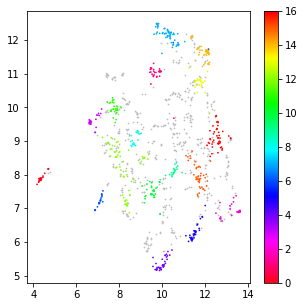

In [14]:
short_text=clean_text(short_text)
tf_idf,top_n_words,topic_sizes,docs_df=bertt(short_text)

In [15]:
df=pd.DataFrame.from_dict(top_n_words,orient='index')
df[df.columns[0:10]] #Top 10 topics with their term frequencies

,0,1,2,3,4,5,6,7,8,9
-1,"(covid, 0.03285187211397282)","(india, 0.018812989833361823)","(delhi, 0.018416202775306173)","(new, 0.015725379697373382)","(govt, 0.015390482609368261)","(man, 0.013680428986105119)","(video, 0.013630659196585111)","(kohli, 0.012657040682543317)","(trump, 0.012224884547221149)","(vaccine, 0.011679013454795491)"
0,"(moon, 0.13186265800119432)","(rocket, 0.1137319946801926)","(space, 0.1137319946801926)","(nasa, 0.09475173163131373)","(china, 0.09111739439526773)","(st, 0.080638831855006)","(musk, 0.0776782985228162)","(rocks, 0.07470534394439393)","(spacex, 0.07470534394439393)","(isro, 0.07470534394439393)"
1,"(china, 0.2637298721397512)","(chinese, 0.22558329986172268)","(soldier, 0.06970986915311805)","(fake, 0.05735411770879776)","(info, 0.050876915272475176)","(india, 0.05068778361601398)","(photo, 0.04839689740651154)","(intel, 0.0464732461020787)","(ties, 0.0464732461020787)","(charge, 0.04490150854351013)"
2,"(quality, 0.20229542729918978)","(air, 0.1848352073328095)","(poor, 0.1798181575992798)","(severe, 0.16928693865329866)","(ghaziabad, 0.145103090274256)","(noida, 0.1296295065211645)","(delhi, 0.1002440618435374)","(lakh, 0.09832446656409248)","(global, 0.08488775316389845)","(category, 0.08058430764337808)"
3,"(dec, 0.11067397219988087)","(till, 0.10908010452454818)","(extends, 0.10908010452454818)","(covid, 0.0916502661739398)","(likely, 0.0881786403008692)","(december, 0.0881786403008692)","(bandh, 0.07544151648595304)","(bharat, 0.07092294990294078)","(literature, 0.06604384586089304)","(deadline, 0.06604384586089304)"
4,"(ti, 0.11553052001748271)","(record, 0.11133036152507642)","(australia, 0.09949003249738789)","(highest, 0.08623468528223802)","(runs, 0.08623468528223802)","(win, 0.08368252170893904)","(kohli, 0.07859229183877764)","(world, 0.0722065750109267)","(hardik, 0.0689877482257904)","(india, 0.06814317929834993)"
5,"(raises, 0.15377790370610608)","(crore, 0.1258479465325704)","(mn, 0.09871922482851402)","(bn, 0.08423275856001765)","(led, 0.07504859192092204)","(valuation, 0.06916080669852095)","(stake, 0.06578953241197663)","(cr, 0.06108268760807679)","(reports, 0.06108268760807679)","(worth, 0.05393483422824445)"
6,"(polls, 0.2940215869174835)","(bjp, 0.2926233645776479)","(ghmc, 0.22011714149605233)","(seats, 0.13355320489864553)","(turnout, 0.11515979690575055)","(trs, 0.11515979690575055)","(voter, 0.11058249328904882)","(cm, 0.10428973992710787)","(wins, 0.10368049869169062)","(votes, 0.09079572571703264)"
7,"(farmers, 0.27950077999123013)","(protest, 0.19993999728008527)","(laws, 0.08863198612233647)","(farm, 0.08683847523541245)","(support, 0.06400197047090106)","(cm, 0.06395125561567935)","(delhi, 0.0564717221706181)","(punjab, 0.05034706376246343)","(amid, 0.04659745401598618)","(govt, 0.04369778535420213)"
8,"(online, 0.11149204470338839)","(startup, 0.09112764664065545)","(founder, 0.09112764664065545)","(ceo, 0.0836190335275413)","(manipal, 0.07786650962611462)","(gaming, 0.07786650962611462)","(recognised, 0.07786650962611462)","(jaipur, 0.07786650962611462)","(ugc, 0.07786650962611462)","(grab, 0.07786650962611462)"


In [16]:
#Topic reduction
def topic_reduction(documents,tf_idf,docs_df):
  import numpy as np
  from sklearn.metrics.pairwise import cosine_similarity
  import numpy as np
  for i in range(20):
    # Calculate cosine similarity
    similarities = cosine_similarity(tf_idf.T)
    np.fill_diagonal(similarities, 0)

    # Extract label to merge into and from where
    topic_sizes = docs_df.groupby(['Topic']).count().sort_values("Doc", ascending=False).reset_index()
    topic_to_merge = topic_sizes.iloc[-1].Topic
    topic_to_merge_into = np.argmax(similarities[topic_to_merge + 1]) - 1

    # Adjust topics
    docs_df.loc[docs_df.Topic == topic_to_merge, "Topic"] = topic_to_merge_into
    old_topics = docs_df.sort_values("Topic").Topic.unique()
    map_topics = {old_topic: index - 1 for index, old_topic in enumerate(old_topics)}
    docs_df.Topic = docs_df.Topic.map(map_topics)
    docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

    # Calculate new topic words
    m = len(documents)
    tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m)
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
    topic_sizes = extract_topic_sizes(docs_df)
  print(topic_sizes.head(10))

# 2. News Data extracted from inshorts

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



    Topic  Size
0      -1   474
5       4   156
9       8   113
2       1    92
6       5    55
10      9    54
3       2    41
7       6    36
8       7    22
4       3    20
11     10    19
1       0    15


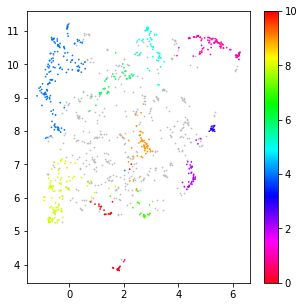

In [17]:
news=clean_text(news)
tf_idf,top_n_words,topic_sizes,docs_df=bertt(news)

In [18]:
df=pd.DataFrame.from_dict(top_n_words,orient='index')
df[df.columns[0:10]] #Top 10 topics with their term frequencies

,0,1,2,3,4,5,6,7,8,9
-1,"(china, 0.010074498494993518)","(covid, 0.009931150543747597)","(added, 0.009674748893133741)","(year, 0.009332444760370442)","(new, 0.008273325158455584)","(state, 0.008094575276029966)","(world, 0.007989801688207444)","(government, 0.007964554346017694)","(president, 0.007939414324186453)","(chinese, 0.007695095290364238)"
0,"(quality, 0.16739997323096314)","(poor, 0.1560114542827463)","(air, 0.15029430992086062)","(noida, 0.12052562633919219)","(aqi, 0.11570735244608088)","(category, 0.10495011488402754)","(index, 0.08453459732100356)","(ghaziabad, 0.08146625699045561)","(faridabad, 0.07841812053777977)","(severe, 0.07669794885357037)"
1,"(australia, 0.06475037194936144)","(ti, 0.05243145455293576)","(india, 0.05212037225386452)","(kohli, 0.04270725702390558)","(odi, 0.03804123140707086)","(captain, 0.03676561255770338)","(jadeja, 0.03570572498624082)","(virat, 0.03243784491329246)","(runs, 0.0321753260511235)","(match, 0.03189802221097978)"
2,"(billion, 0.050487621672078986)","(funding, 0.041312952407715674)","(million, 0.04027838292940776)","(raised, 0.032472576926343345)","(crore, 0.030439922483388948)","(capital, 0.0302961650989915)","(round, 0.029076655694879293)","(startup, 0.028659705063404494)","(platform, 0.028266593551437864)","(phonepe, 0.02707506420135018)"
3,"(space, 0.11166472616088195)","(moon, 0.08697453246524359)","(nasa, 0.0693868201387658)","(spacex, 0.06786475811481647)","(musk, 0.05859239057781558)","(rocket, 0.04867824376776806)","(elon, 0.04432525702224905)","(mars, 0.04326562237432688)","(iss, 0.03604520127868597)","(years, 0.0342805922309971)"
4,"(police, 0.04597481457116583)","(allegedly, 0.027161735976601573)","(arrested, 0.02527245469152299)","(accused, 0.02259098145584585)","(old, 0.022039815152683155)","(year, 0.018590114288265142)","(incident, 0.017923989435324077)","(man, 0.01739624740988401)","(case, 0.015654732470486005)","(died, 0.01509754995483824)"
5,"(film, 0.05370983548776097)","(actor, 0.041174675107567026)","(actress, 0.03797584617099231)","(upcoming, 0.035906241165712185)","(films, 0.03155034132862276)","(khan, 0.02413658024437715)","(love, 0.024136100418599385)","(like, 0.021349831537256975)","(added, 0.020117093731441486)","(speaking, 0.019137180786310052)"
6,"(google, 0.03388262738976971)","(gebru, 0.02916815348601766)","(comments, 0.02516812853637247)","(actress, 0.023373191860747357)","(email, 0.022221337789946945)","(twitter, 0.02121117775008718)","(instagram, 0.020965598031344842)","(coronavirus, 0.018552945679723567)","(himanshi, 0.018512910467123955)","(user, 0.017977234668837477)"
7,"(cases, 0.10670090827555093)","(deaths, 0.07098260892268077)","(coronavirus, 0.07017720976211866)","(toll, 0.0677080240449175)","(reported, 0.06672120562136534)","(country, 0.06261330554755376)","(number, 0.0617575815991737)","(taking, 0.05644566217466729)","(death, 0.055516943485982746)","(hours, 0.05391884686850681)"
8,"(farmers, 0.06648204459523538)","(laws, 0.0418324475060226)","(protest, 0.03215710264171969)","(farm, 0.03151213261229755)","(government, 0.029685869445968474)","(delhi, 0.028911524971483738)","(border, 0.024928412718797432)","(protesting, 0.021386467755274755)","(centre, 0.0209162237530113)","(protests, 0.019572212946356093)"


In [19]:
topic_reduction(news,tf_idf,docs_df) #after reduction

   Topic  Size
0     -1  1097


# 3.Abstracts from scientific articles on LDA extracted from citeseerx

In [20]:
abstracts=(scientific_df['abstarcts']).tolist()


   Topic  Size
3      2   407
2      1    44
1      0    37
0     -1    12


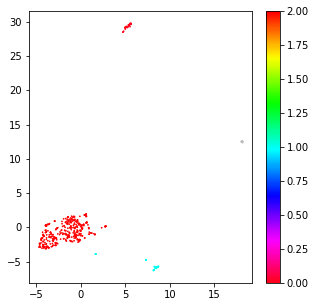

In [21]:
#abstracts=clean_text(abstracts)
tf_idf,top_n_words,topic_sizes,docs_df=bertt(abstracts)

In [22]:
df=pd.DataFrame.from_dict(top_n_words,orient='index')
df[df.columns[0:10]] #Top 10 topics with their term frequencies

,0,1,2,3,4,5,6,7,8,9
-1,"(implementation, 0.16926579869737501)","(note, 0.1654577966665483)","(bold, 0.13754490519499743)","(italicised, 0.13754490519499743)","(terms, 0.13321027452566017)","(interpretation, 0.132171784350715)","(routine, 0.12818141331056887)","(details, 0.12818141331056887)","(read, 0.12722220040182824)","(dependent, 0.12722220040182824)"
0,"(secre, 0.1623959093488896)","(lication, 0.1623959093488896)","(submitted, 0.1623959093488896)","(accepted, 0.1623959093488896)","(ar, 0.1623959093488896)","(pub, 0.1623959093488896)","(mail, 0.1623959093488896)","(following, 0.13544618194082622)","(source, 0.13008378321159225)","(author, 0.12554993968726114)"
1,"(implementation, 0.10398463247461547)","(note, 0.10164527216269532)","(purpose, 0.0881073934129001)","(bold, 0.08449761573528937)","(italicised, 0.08449761573528937)","(terms, 0.08183473297614387)","(interpretation, 0.08119675991837785)","(details, 0.07874536531155124)","(routine, 0.07874536531155124)","(dependent, 0.07815609445738045)"
2,"(analysis, 0.016773196238394267)","(recognition, 0.016185573190679557)","(face, 0.016041859982806866)","(paper, 0.015965490922708037)","(abstract, 0.015569652304789655)","(discriminant, 0.015341800543453042)","(linear, 0.01517122703799936)","(lda, 0.014898024112953408)","(based, 0.013634010703977012)","(data, 0.013634010703977012)"


In [23]:
topic_reduction(abstracts,tf_idf,docs_df) #after reduction

   Topic  Size
0     -1   500


#4 Tweets from twitter about 'Joe Biden'

In [24]:
social_media.head(5)
social_data=(social_media[2]).tolist()
social_data=clean_text(social_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
social_data[:5]

['let infrastructure week week week... roads, airports, subways, broadband networks, windmills, sol… https://t.co/zetgidp',
 'rt @altnoaa: sidney powell trump literally got asses handed today georgia courtroom. "they want substitute ju…',
 'rt @waynedupreeshow: hillary clinton told joe biden lost, not to give up, media said nothing except wouldn’t project w…',
 'rt @weinsteinlaw: joe biden received greater percentage vote incumbent president anyone since . he’s also curr…',
 'rt @marceelias: 🚨new: declaring "this election still over" trump files motion immediate consideration michigan supreme…']


    Topic  Size
15     14   442
10      9    71
11     10    63
2       1    51
1       0    48
9       8    43
4       3    40
0      -1    35
5       4    35
14     13    31
7       6    28
12     11    25
8       7    24
13     12    23
6       5    21
3       2    20


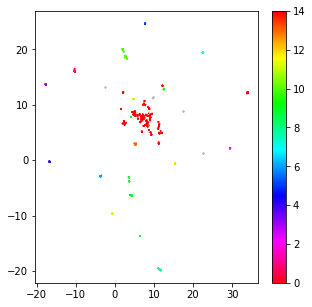

In [26]:
tf_idf,top_n_words,topic_sizes,docs_df=bertt(social_data)

In [27]:
df=pd.DataFrame.from_dict(top_n_words,orient='index')
df[df.columns[0:10]] #Top 10 topics with their term frequencies

,0,1,2,3,4,5,6,7,8,9
-1,"(insistence, 0.11811538111433674)","(appointing, 0.11811538111433674)","(complaining, 0.11811538111433674)","(competent, 0.11811538111433674)","(positions, 0.11811538111433674)","(middleageriot, 0.10964690919019265)","(administratio, 0.10964690919019265)","(republicans, 0.09768265698803835)","(govwhitmer, 0.09196788071052003)","(beschlossdc, 0.09196788071052003)"
0,"(second, 0.24964435612949923)","(breaking, 0.23727602236964312)","(final, 0.22042295016173513)","(recount, 0.21152561887625965)","(winner, 0.19974131437210724)","(votes, 0.1979296488190734)","(marceelias, 0.19703837472601107)","(certified, 0.18318542313915023)","(georgia, 0.096265220013042)","(joe, 0.027144178340775905)"
1,"(michigan, 0.23076675770658311)","(immediate, 0.22881944845667193)","(declaring, 0.22881944845667193)","(consideration, 0.22881944845667193)","(files, 0.22881944845667193)","(motion, 0.22881944845667193)","(supreme, 0.22722124903798965)","(marceelias, 0.1757111193033249)","(new, 0.15161576431699758)","(election, 0.13604888021849626)"
2,"(associations, 0.32600191711901216)","(penalize, 0.32600191711901216)","(bar, 0.32600191711901216)","(needed, 0.32193607010489284)","(investigate, 0.31435508858774897)","(lawyers, 0.3108084540528493)","(members, 0.27701969504383556)","(presid, 0.2490073803797346)","(nearly, 0.2490073803797346)","(called, 0.24498279620966243)"
3,"(worldwide, 0.23033100714620397)","(tweeted, 0.22856409390181245)","(floyd, 0.22683976105179024)","(twitter, 0.22633909066412725)","(george, 0.2251560045286994)","(kobe, 0.22457273196754887)","(nbcnews, 0.22230129969895984)","(brya, 0.22230129969895984)","(people, 0.18927194289379762)","(donald, 0.18254357440375996)"
4,"(kirkacevedo, 0.23462739111927178)","(handcuffed, 0.23462739111927178)","(seats, 0.23462739111927178)","(better, 0.23261601100969917)","(help, 0.23261601100969917)","(don, 0.21689673343387472)","(senate, 0.21517786700653424)","(want, 0.2106996839071926)","(win, 0.15908077941385682)","(president, 0.1160393964460106)"
5,"(completed, 0.35120298556897406)","(briantylercohen, 0.34697389323852923)","(final, 0.24046140017643836)","(recount, 0.23075522059228326)","(winner, 0.21789961567866248)","(certified, 0.19983864342452753)","(new, 0.18547462077514135)","(georgia, 0.10501660365059128)","(joe, 0.02961183091721008)","(biden, 0.028237234281407782)"
6,"(gafollowers, 0.22493167403133757)","(recounting, 0.22493167403133757)","(announced, 0.22493167403133757)","(htt, 0.22254016713174726)","(rd, 0.20987923025502503)","(officials, 0.20412383279652005)","(time, 0.18748609895224014)","(today, 0.17575631635652367)","(georgia, 0.1493284876299871)","(votes, 0.1448265723066391)"
7,"(violated, 0.20865462649701771)","(peter, 0.20865462649701771)","(trade, 0.2063708785518286)","(coiunsel, 0.18910929992175524)","(macfarlanenews, 0.18910929992175524)","(narvarro, 0.18910929992175524)","(atta, 0.18910929992175524)","(advisor, 0.18910929992175524)","(hatch, 0.18910929992175524)","(special, 0.18683209635920803)"
8,"(cmclymer, 0.2017157642846252)","(congratulations, 0.20105585761388942)","(candidate, 0.1961071943208053)","(year, 0.1848361794748963)","(times, 0.17202973864938287)","(presidential, 0.1523296944148555)","(win, 0.13062162691961776)","(georgia, 0.08624153305687063)","(blow, 0.052046339553517056)","(reaffirms, 0.052046339553517056)"


In [28]:
topic_reduction(social_data,tf_idf,docs_df) #after reduction

   Topic  Size
0     -1  1000


#5 Legal data taken from maryland legislation public cases


In [29]:
legal=pd.read_csv('/content/legal.csv')
legal=legal.dropna()

In [30]:
legal_text=legal['purpose'].tolist()
legal_text=clean_text(legal_text)
legal_text[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['for purpose providing certain deputy sheriffs correctional officers office sheriff harford county right organize negotiate harford county executive harford county sheriff regard certain wages employee health care premium share; requiring right organize negotiate conducted accordance certain provisions harford county code unless otherwise provided act; requiring terms agreement regard certain wages employee health care premium share set forth memorandum agreement entered sheriff, county executive, employee organization; providing agreement regard certain wages employee health care premium share effective agreement ratified sheriff, county executive, employee organization; providing modification existing memorandum agreement valid except certain circumstances; requiring certain procedures set forth harford county code apply certain parties unable reach certain agreement; providing construction act; generally relating salaries negotiation rights sworn law enforcement officers correction


   Topic  Size
9      8  2617
7      6   226
5      4   143
3      2    94
1      0    45
4      3    38
2      1    32
6      5    27
8      7    16
0     -1    12
   Topic  Size
9      8  2617
7      6   226
5      4   143
3      2    94
1      0    45
4      3    38
2      1    32
6      5    27
8      7    16
0     -1    12


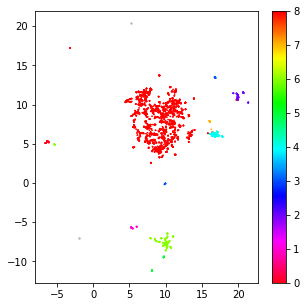

In [31]:
tf_idf,top_n_words,topic_sizes,docs_df=bertt(legal_text)
print(topic_sizes)

In [32]:
df=pd.DataFrame.from_dict(top_n_words,orient='index')
df[df.columns[0:10]] #Top 10 topics with their term frequencies

,0,1,2,3,4,5,6,7,8,9
-1,"(drilling, 0.14394873362743307)","(offshore, 0.12794450980019667)","(activity, 0.11919256716356819)","(oil, 0.08308463544578387)","(gas, 0.07539093907033353)","(spill, 0.06656386230472244)","(indicate, 0.05256439357430171)","(matter, 0.05079263336184232)","(damages, 0.04860800980153603)","(liability, 0.04715029896420456)"
0,"(sectarian, 0.07783119093121317)","(matching, 0.07553093419321441)","(religious, 0.07223232422505804)","(proceeds, 0.06516727762457372)","(loan, 0.06385399517677429)","(purposes, 0.05062118418074892)","(expend, 0.04113320102945095)","(grantee, 0.041032595827203734)","(exceed, 0.04039122784029802)","(encumbrance, 0.03894322479022512)"
1,"(mayor, 0.08401018565559766)","(city, 0.0637597941597486)","(proceeds, 0.058415754850870576)","(council, 0.058022517090938315)","(loan, 0.057238532350299604)","(expend, 0.04916223960150841)","(grantee, 0.04904199666066618)","(exceed, 0.048275436172888445)","(encumbrance, 0.04654478863975749)","(evidencing, 0.046491081164670774)"
2,"(appropriation, 0.08440086297651009)","(proceeds, 0.04430990876270053)","(loan, 0.043416954084174786)","(special, 0.04157369359190867)","(fund, 0.03418038817813512)","(encumbrance, 0.0339522930390494)","(evidencing, 0.033913115894070936)","(disbursement, 0.03387403039162055)","(expenditure, 0.033602962308323485)","(creation, 0.033602962308323485)"
3,"(lottery, 0.10429624264063746)","(racing, 0.08096566060475165)","(instant, 0.06330535258251169)","(gaming, 0.061145372753836)","(race, 0.04728162183913433)","(video, 0.046600448839433754)","(bingo, 0.044429475485230505)","(licensee, 0.039595105488085806)","(downs, 0.03872007114425656)","(machines, 0.03673148538998158)"
4,"(license, 0.07872656879633881)","(beer, 0.06930193965776228)","(class, 0.06400298226141066)","(beverages, 0.05974970737268952)","(alcoholic, 0.059749045550832415)","(holder, 0.05452806546700266)","(wine, 0.051122187316921044)","(licenses, 0.0412366430059333)","(premises, 0.03984460731704166)","(liquor, 0.036754205184868896)"
5,"(proceeds, 0.05695264312499966)","(loan, 0.05580490595846129)","(arundel, 0.05117488926580879)","(anne, 0.05079126594904118)","(expend, 0.04793089628642721)","(grantee, 0.04781366501353566)","(exceed, 0.04706630420298747)","(executive, 0.04705811844936544)","(encumbrance, 0.045379003378386386)","(evidencing, 0.04532664108897376)"
6,"(proceeds, 0.05778271224232422)","(loan, 0.05661824712209531)","(expend, 0.04841140652488763)","(grantee, 0.04829300000114003)","(exceed, 0.047966418444896984)","(evidencing, 0.04619348533929237)","(creation, 0.045975356122017606)","(encumbrance, 0.045833930730550664)","(disbursement, 0.04572827999418014)","(debt, 0.04570944636389882)"
7,"(charles, 0.15179205825354858)","(user, 0.10778180078931526)","(fee, 0.10177446534695136)","(distribute, 0.09203373508431326)","(revenues, 0.08838459785803604)","(highway, 0.08477054951405699)","(retail, 0.08046177408821457)","(increasing, 0.07386293791655121)","(cigarette, 0.06769055257303824)","(cigarettes, 0.06621855296930335)"
8,"(tax, 0.006302131857599998)","(health, 0.006223548697391491)","(act, 0.006209357858523651)","(department, 0.006190077291288176)","(law, 0.00612836114491639)","(program, 0.0061167237692693905)","(public, 0.006052972219547082)","(information, 0.006038828023000442)","(maryland, 0.00603794786171818)","(application, 0.006011426514057885)"


In [33]:
topic_reduction(legal_text,tf_idf,docs_df) #after reduction

   Topic  Size
0     -1  3250
